# Standard
Top R,G,B 평균 -> Thickness 예측

In [3]:
import sys
sys.path.append('../') 

In [4]:
from pipeline import Solar_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
trial_name = 'Standard/'
dataset = pd.read_csv('../data/Standard.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP1 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    except_model = Except_models, test_size=test_size, random_state=random_state)

In [6]:
SP1.display_dataset()

,Top_R,Top_G,Top_B,Thickness
0,11.6946,10.9098,8.1691,48.266667
1,12.3677,12.7517,11.2189,47.966667
2,12.6729,12.8985,9.9953,48.166667
3,11.4028,11.4436,8.6145,48.600000
4,5.5140,3.0513,1.7067,59.533333


In [7]:
SP1.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor
Time consumed loading/training model :: 200.03 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])
**************************************************


R2       0.862356
RMSE     9.100668
MSE     82.822164
MAE      5.528795
MAPE     5.483482
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor
Time consumed loading/training model :: 143.76 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.10005914688445117), ('max_depth', 30), ('max_features', 'sqrt'), ('min_samples_leaf', 9), ('min_samples_split', 20), ('n_estimator

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1681 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
241 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError

Time consumed loading/training model :: 126.56 s
BEST PARAMS >> MLPRegressor: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
**************************************************


R2       0.951537
RMSE     5.400063
MSE     29.160680
MAE      4.520326
MAPE     5.326819
Name: MLPRegressor, dtype: float64


In [8]:
SP1.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
MLPRegressor,0.95154,5.40006,29.16068,4.52033,5.32682
LGBMRegressor,0.87251,8.75851,76.71144,5.26124,5.22335
RandomForestRegressor,0.86236,9.10067,82.82216,5.52879,5.48348
GradientBoostingRegressor,0.85726,9.26756,85.88765,5.71369,5.70696
XGBRegressor,0.85129,9.45931,89.47854,5.82822,5.79997
CatBoostRegressor,0.84150,9.76568,95.36848,5.46938,5.25872
AdaBoostRegressor,0.81548,10.53685,111.02513,6.18171,5.91734
KNeighborsRegressor,0.73956,12.51831,156.70813,6.11197,5.72834
DecisionTreeRegressor,-0.00475,24.58800,604.56988,11.60087,10.91588


Best Model: MLPRegressor
Best hyperparams: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Best performance: R2       0.951537
RMSE     5.400063
MSE     29.160680
MAE      4.520326
MAPE     5.326819
Name: MLPRegressor, dtype: float64


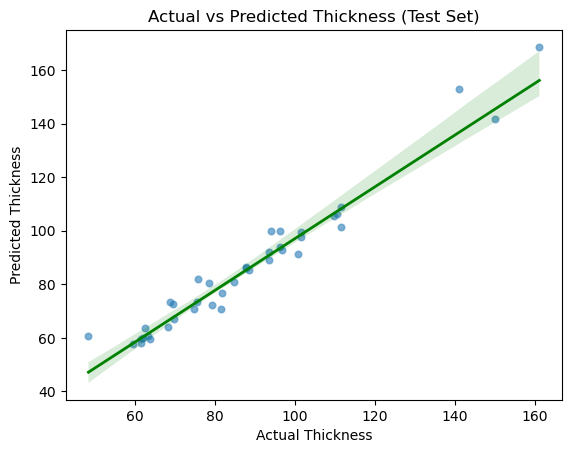

In [9]:
best_model, y_pred, test_pred = SP1.summarize(metric='RMSE')

# Standard_w_B
Top, Bot RGB 평균 -> Thickness 예측

In [10]:
trial_name = 'Standard_w_B/'
dataset = pd.read_csv('../data/Standard_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP2 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    except_model = Except_models, test_size=test_size, random_state=random_state)

In [11]:
SP2.display_dataset()

,Top_R,Top_G,Top_B,Bot_R,Bot_G,Bot_B,Thickness
0,11.6946,10.9098,8.1691,30.0046,37.9564,49.9154,48.266667
1,12.3677,12.7517,11.2189,25.7097,34.7937,43.0995,47.966667
2,12.6729,12.8985,9.9953,31.0536,35.7752,41.5669,48.166667
3,11.4028,11.4436,8.6145,24.9250,32.4114,39.4482,48.600000
4,5.5140,3.0513,1.7067,25.9343,32.6192,38.1195,59.533333


In [12]:
SP2.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor
Time consumed loading/training model :: 213.67 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 30), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])
**************************************************


R2        0.793905
RMSE     11.135960
MSE     124.009613
MAE       6.623713
MAPE      6.582916
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor
Time consumed loading/training model :: 146.54 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.2), ('max_depth', 3), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimators', 500)])
*

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1680 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError

Time consumed loading/training model :: 131.27 s
BEST PARAMS >> MLPRegressor: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': [50, 50], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
**************************************************


R2       0.837480
RMSE     9.888893
MSE     97.790211
MAE      6.622568
MAPE     6.988691
Name: MLPRegressor, dtype: float64


In [13]:
SP2.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
KNeighborsRegressor,0.96072,4.86163,23.63544,3.68129,4.02106
GradientBoostingRegressor,0.89544,7.93188,62.91472,5.41216,5.58968
XGBRegressor,0.84603,9.62534,92.64710,5.62460,5.46859
MLPRegressor,0.83748,9.88889,97.79021,6.62257,6.98869
AdaBoostRegressor,0.82490,10.26445,105.35896,6.54646,6.45824
RandomForestRegressor,0.79391,11.13596,124.00961,6.62371,6.58292
DecisionTreeRegressor,0.73866,12.54003,157.25232,7.71435,8.52924
CatBoostRegressor,0.72192,12.93527,167.32118,6.88090,6.57210
LGBMRegressor,0.69673,13.50846,182.47846,7.47524,7.16967


Best Model: KNeighborsRegressor
Best hyperparams: OrderedDict([('algorithm', 'auto'), ('n_neighbors', 2), ('weights', 'distance')])
Best performance: R2       0.960720
RMSE     4.861630
MSE     23.635442
MAE      3.681286
MAPE     4.021058
Name: KNeighborsRegressor, dtype: float64


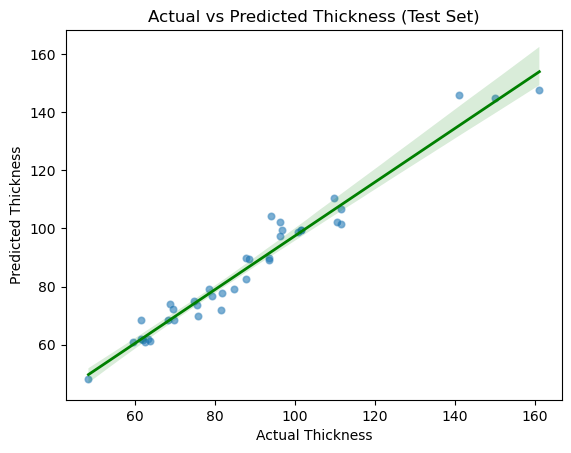

In [14]:
best_model, y_pred, test_pred = SP2.summarize(metric='RMSE')

# Correction Methods


## Histogram Equalization

Top RGB 평균 + Histogram equalization -> Thickness 예측

In [15]:
trial_name = 'Histogram_Equalization/'
dataset = pd.read_csv('../data/Histogram_Equalization.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP3 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    except_model = Except_models, test_size=test_size, random_state=random_state)

In [16]:
SP3.display_dataset()

,Top_R,Top_G,Top_B,Thickness
0,140.5183,139.7240,137.0516,48.266667
1,139.2869,139.6661,138.1536,47.966667
2,139.9864,140.2005,137.4057,48.166667
3,140.2039,140.1815,137.5420,48.600000
4,146.7461,144.1289,143.1082,59.533333


In [17]:
SP3.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor
Time consumed loading/training model :: 127.05 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 19), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 208)])
**************************************************


R2        0.621865
RMSE     15.084036
MSE     227.528156
MAE       9.497904
MAPE     10.972854
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor
Time consumed loading/training model :: 126.82 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.17843706156693875), ('max_depth', 3), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estim

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1680 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError

In [18]:
SP3.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
MLPRegressor,0.88556,8.29819,68.85990,6.68404,7.99402
KNeighborsRegressor,0.80794,10.75003,115.56310,6.03347,7.30467
AdaBoostRegressor,0.79899,10.99761,120.94739,7.53733,9.55614
GradientBoostingRegressor,0.77126,11.73170,137.63286,7.09827,9.61598
CatBoostRegressor,0.69114,13.63256,185.84681,7.08573,9.70247
RandomForestRegressor,0.62187,15.08404,227.52816,9.49790,10.97285
XGBRegressor,0.58376,15.82576,250.45476,8.91036,11.20909
DecisionTreeRegressor,0.33856,19.94991,397.99878,11.20761,14.30677
LGBMRegressor,0.20291,21.90013,479.61574,11.77346,12.03359


Best Model: MLPRegressor
Best hyperparams: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': [50, 50], 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
Best performance: R2       0.885560
RMSE     8.298187
MSE     68.859903
MAE      6.684045
MAPE     7.994024
Name: MLPRegressor, dtype: float64


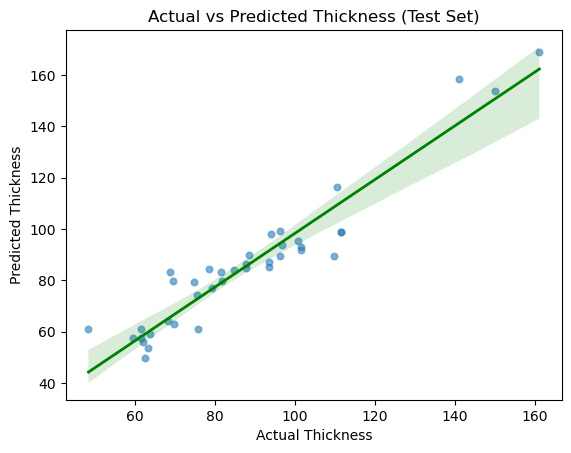

In [19]:
best_model, y_pred, test_pred = SP3.summarize(metric='RMSE')

## Histogram Equalization with Bot

Top, Bot RGB 평균 + Histogram equalization -> Thickness 예측

In [20]:
trial_name = 'Histogram_Equalization_w_B/'
dataset = pd.read_csv('../data/Histogram_Equalization_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP4 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    except_model = Except_models, test_size=test_size, random_state=random_state)

In [21]:
SP4.display_dataset()

,Top_R,Top_G,Top_B,Bot_R,Bot_G,Bot_B,Thickness
0,140.5183,139.7240,137.0516,130.1523,138.1153,149.4018,48.266667
1,139.2869,139.6661,138.1536,130.1640,139.3454,146.6704,47.966667
2,139.9864,140.2005,137.4057,132.8199,138.3944,142.8911,48.166667
3,140.2039,140.1815,137.5420,131.3105,139.1805,145.0480,48.600000
4,146.7461,144.1289,143.1082,131.9079,139.2374,143.4036,59.533333


In [22]:
SP4.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor
Time consumed loading/training model :: 207.29 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 6), ('n_estimators', 50)])
**************************************************


R2        0.505781
RMSE     17.244630
MSE     297.377267
MAE      10.735921
MAPE     12.283039
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor
Time consumed loading/training model :: 139.86 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.1439178138648706), ('max_depth', 3), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimat

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Time consumed loading/training model :: 75.28 s
BEST PARAMS >> DecisionTreeRegressor: OrderedDict([('max_depth', 30), ('max_features', 'auto'), ('min_samples_leaf', 1), ('min_samples_split', 2)])
**************************************************


R2        0.712773
RMSE     13.146409
MSE     172.828063
MAE       7.040171
MAPE      8.879088
Name: DecisionTreeRegressor, dtype: float64
Model not found. Training the model >> MLPRegressor
BayesSearchCV failed. Using the grid search >> MLPRegressor


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1680 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError

Time consumed loading/training model :: 116.06 s
BEST PARAMS >> MLPRegressor: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
**************************************************


R2       0.876368
RMSE     8.625016
MSE     74.390896
MAE      5.781207
MAPE     6.872073
Name: MLPRegressor, dtype: float64


In [23]:
SP4.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
MLPRegressor,0.87637,8.62502,74.39090,5.78121,6.87207
AdaBoostRegressor,0.77414,11.65782,135.90476,7.73870,9.95064
XGBRegressor,0.72448,12.87581,165.78648,7.58851,9.46017
DecisionTreeRegressor,0.71277,13.14641,172.82806,7.04017,8.87909
KNeighborsRegressor,0.68181,13.83685,191.45852,8.04103,10.36018
GradientBoostingRegressor,0.68074,13.86009,192.10221,7.75314,10.50493
CatBoostRegressor,0.67315,14.02381,196.66723,8.12769,10.52094
RandomForestRegressor,0.50578,17.24463,297.37727,10.73592,12.28304
LGBMRegressor,0.00281,24.49531,600.02032,14.83765,17.15378


Best Model: MLPRegressor
Best hyperparams: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Best performance: R2       0.876368
RMSE     8.625016
MSE     74.390896
MAE      5.781207
MAPE     6.872073
Name: MLPRegressor, dtype: float64


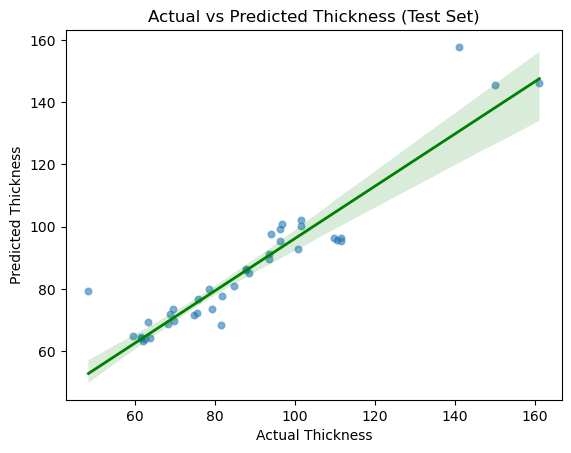

In [24]:
best_model, y_pred, test_pred = SP4.summarize(metric='RMSE')

## Zscore Normalization

Top RGB 평균 + Zscore Normalization -> Thickness 예측

In [25]:
trial_name = 'Zscore_Normalization/'
dataset = pd.read_csv('../data/Zscore_Normalization.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP5 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    except_model = Except_models, test_size=test_size, random_state=random_state)

In [26]:
SP5.display_dataset()

,Top_R,Top_G,Top_B,Thickness
0,0.404752,0.184016,-0.588784,48.266667
1,0.078087,0.193500,-0.271588,47.966667
2,0.239253,0.304375,-0.543628,48.166667
3,0.268439,0.281018,-0.549452,48.600000
4,0.744024,-0.132130,-0.611919,59.533333


In [27]:
SP5.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor
Time consumed loading/training model :: 182.60 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 30), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimators', 50)])
**************************************************


R2        0.631766
RMSE     14.885243
MSE     221.570452
MAE       9.245193
MAPE      9.311211
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\se99a\a

Time consumed loading/training model :: 110.17 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.15252214786783683), ('max_depth', 30), ('max_features', 'auto'), ('min_samples_leaf', 16), ('min_samples_split', 2), ('n_estimators', 50)])
**************************************************


R2        0.060322
RMSE     23.778457
MSE     565.415013
MAE      11.506993
MAPE     10.669935
Name: GradientBoostingRegressor, dtype: float64
Model not found. Training the model >> AdaBoostRegressor
Time consumed loading/training model :: 79.82 s
BEST PARAMS >> AdaBoostRegressor: OrderedDict([('learning_rate', 0.001), ('n_estimators', 50)])
**************************************************


R2       0.928710
RMSE     6.549519
MSE     42.896203
MAE      5.184347
MAPE     5.812152
Name: AdaBoostRegressor, dtype: float64
Model not found. Training the model >> XGBRegressor
Time consumed loading/training model :: 100.17 s
BEST PARAMS >> XGBRegressor: OrderedDict([('colsample_b

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1456 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(

Time consumed loading/training model :: 155.11 s
BEST PARAMS >> MLPRegressor: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'adaptive', 'solver': 'sgd'}
**************************************************


R2       0.834142
RMSE     9.989920
MSE     99.798505
MAE      6.869749
MAPE     7.119052
Name: MLPRegressor, dtype: float64


In [28]:
SP5.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
AdaBoostRegressor,0.92871,6.54952,42.89620,5.18435,5.81215
CatBoostRegressor,0.85825,9.23545,85.29359,6.49927,6.64526
MLPRegressor,0.83414,9.98992,99.79850,6.86975,7.11905
XGBRegressor,0.72181,12.93785,167.38809,8.38777,8.20781
RandomForestRegressor,0.63177,14.88524,221.57045,9.24519,9.31121
KNeighborsRegressor,0.61850,15.15110,229.55589,8.83746,9.05304
LGBMRegressor,0.21248,21.76830,473.85906,11.99043,12.11172
GradientBoostingRegressor,0.06032,23.77846,565.41501,11.50699,10.66993
DecisionTreeRegressor,-0.00508,24.59205,604.76898,12.87777,12.70399


Best Model: AdaBoostRegressor
Best hyperparams: OrderedDict([('learning_rate', 0.001), ('n_estimators', 50)])
Best performance: R2       0.928710
RMSE     6.549519
MSE     42.896203
MAE      5.184347
MAPE     5.812152
Name: AdaBoostRegressor, dtype: float64


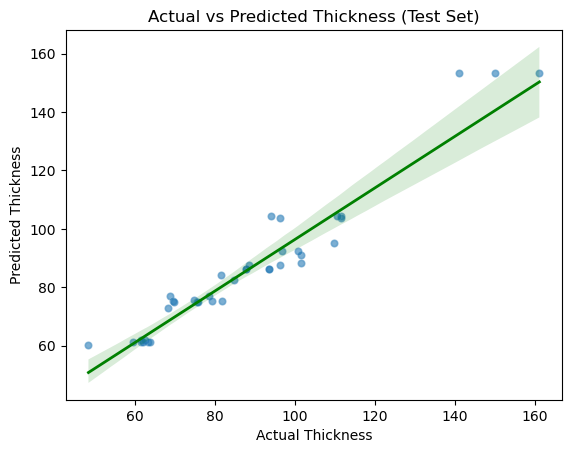

In [29]:
best_model, y_pred, test_pred = SP5.summarize(metric='RMSE')

## Zscore Normalization with Bot

Top, Bot RGB 평균 + Zscore Normalization -> Thickness 예측

In [30]:
trial_name = 'Zscore_Normalization_w_B/'
dataset = pd.read_csv('../data/Zscore_Normalization_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP6 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    except_model = Except_models, test_size=test_size, random_state=random_state)

In [31]:
SP6.display_dataset()

,Top_R,Top_G,Top_B,Bot_R,Bot_G,Bot_B,Thickness
0,0.404752,0.184016,-0.588784,-1.008400,-0.144374,1.152771,48.266667
1,0.078087,0.193500,-0.271588,-1.066301,0.030655,1.035654,47.966667
2,0.239253,0.304375,-0.543628,-0.846492,-0.059919,0.906468,48.166667
3,0.268439,0.281018,-0.549452,-1.012692,0.020495,0.992185,48.600000
4,0.744024,-0.132130,-0.611919,-0.968173,0.059892,0.908289,59.533333


In [32]:
SP6.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor


Time consumed loading/training model :: 197.35 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 22), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 50)])
**************************************************


R2        0.452678
RMSE     18.147454
MSE     329.330075
MAE       9.593966
MAPE      9.621250
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor
Time consumed loading/training model :: 152.63 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.1155210620531855), ('max_depth', 26), ('max_features', 'sqrt'), ('min_samples_leaf', 7), ('min_samples_split', 17), ('n_estimators', 453)])
**************************************************


R2        0.593691
RMSE     15.635882
MSE     244.480812
MAE       9.910959
MAPE     10.590527
Name: GradientBoostingRegressor, dtype: float64
Model not found. Training the model >> AdaBoostRegressor
Time co

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1478 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(

Time consumed loading/training model :: 178.62 s
BEST PARAMS >> MLPRegressor: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
**************************************************


R2        0.336459
RMSE     19.981503
MSE     399.260452
MAE       9.606087
MAPE      8.856879
Name: MLPRegressor, dtype: float64


In [33]:
SP6.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
CatBoostRegressor,0.73392,12.65316,160.10240,8.04621,8.32854
AdaBoostRegressor,0.62214,15.07850,227.36127,8.31531,8.01052
GradientBoostingRegressor,0.59369,15.63588,244.48081,9.91096,10.59053
XGBRegressor,0.58629,15.77771,248.93613,8.68739,8.79526
RandomForestRegressor,0.45268,18.14745,329.33008,9.59397,9.62125
LGBMRegressor,0.40045,18.99360,360.75674,11.52498,12.96817
MLPRegressor,0.33646,19.98150,399.26045,9.60609,8.85688
KNeighborsRegressor,0.31257,20.33798,413.63349,10.75465,10.47721
DecisionTreeRegressor,0.16927,22.35754,499.85963,12.60590,13.44024


Best Model: CatBoostRegressor
Best hyperparams: OrderedDict([('depth', 5), ('iterations', 500), ('learning_rate', 0.18194044989243544)])
Best performance: R2        0.733922
RMSE     12.653158
MSE     160.102399
MAE       8.046214
MAPE      8.328537
Name: CatBoostRegressor, dtype: float64


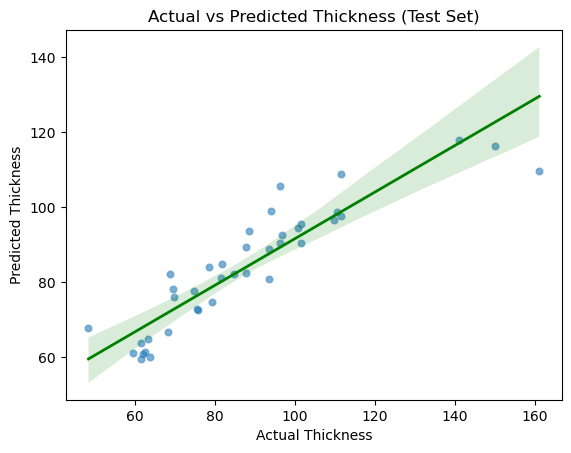

In [34]:
best_model, y_pred, test_pred = SP6.summarize(metric='RMSE')

## MinMax Normalization

Top RGB 평균 + MinMax Normalization -> Thickness 예측

In [35]:
trial_name = 'MinMax_Normalization/'
dataset = pd.read_csv('../data/MinMax_Normalization.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP7 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    except_model = Except_models, test_size=test_size, random_state=random_state)

In [36]:
SP7.display_dataset()

,Top_R,Top_G,Top_B,Thickness
0,0.417672,0.389686,0.291707,48.266667
1,0.458068,0.472150,0.415392,47.966667
2,0.422472,0.429908,0.333076,48.166667
3,0.438525,0.440173,0.331256,48.600000
4,0.324013,0.179397,0.100209,59.533333


In [37]:
SP7.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor
Time consumed loading/training model :: 215.46 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 30), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 50)])
**************************************************


R2       0.887304
RMSE     8.234704
MSE     67.810343
MAE      5.623812
MAPE     5.784459
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor
Time consumed loading/training model :: 198.68 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.09488313632294879), ('max_depth', 13), ('max_features', 'sqrt'), ('min_samples_leaf', 2), ('min_samples_split', 20), ('n_estimators

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 745, in fit
    self._validate_params()
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\se99a

Time consumed loading/training model :: 142.04 s
BEST PARAMS >> MLPRegressor: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': [50, 50], 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
**************************************************


R2       0.934085
RMSE     6.297767
MSE     39.661872
MAE      4.516280
MAPE     4.929003
Name: MLPRegressor, dtype: float64


In [38]:
SP7.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
AdaBoostRegressor,0.93820,6.09787,37.18396,4.84936,5.44693
MLPRegressor,0.93408,6.29777,39.66187,4.51628,4.92900
GradientBoostingRegressor,0.92925,6.52444,42.56837,4.89389,5.42965
XGBRegressor,0.92358,6.78098,45.98171,5.46056,6.05857
CatBoostRegressor,0.92010,6.93379,48.07746,5.52153,6.08545
RandomForestRegressor,0.88730,8.23470,67.81034,5.62381,5.78446
KNeighborsRegressor,0.73954,12.51891,156.72313,7.04138,6.88307
DecisionTreeRegressor,0.48381,17.62371,310.59507,10.79608,10.95893
LGBMRegressor,0.32617,20.13588,405.45350,10.92398,10.98268


Best Model: AdaBoostRegressor
Best hyperparams: OrderedDict([('learning_rate', 0.7599224189072973), ('n_estimators', 500)])
Best performance: R2       0.938203
RMSE     6.097865
MSE     37.183959
MAE      4.849356
MAPE     5.446930
Name: AdaBoostRegressor, dtype: float64


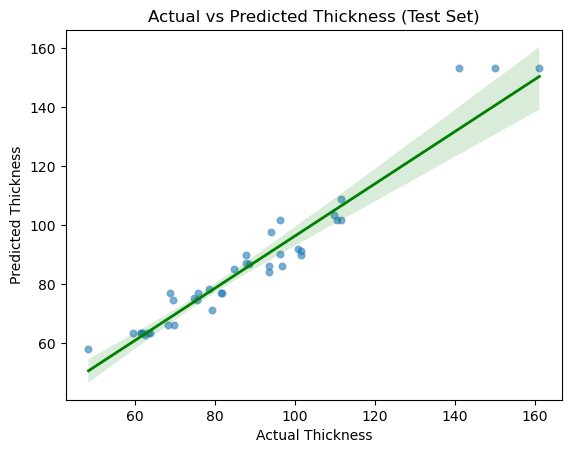

In [39]:
best_model, y_pred, test_pred = SP7.summarize(metric='RMSE')

## MinMax Normalization with Bot

Top, Bot RGB 평균 + MinMax Normalization -> Thickness 예측

In [40]:
trial_name = 'MinMax_Normalization_w_B/'
dataset = pd.read_csv('../data/MinMax_Normalization_w_B.csv')
hyperparams_path = '../hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
Except_models = ['SVR','BayesianRidge','ARDRegression','Lasso','Ridge','LinearRegression','ElasticNet','SGDRegressor']
test_size = 0.3
random_state = 42

SP8 = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    except_model = Except_models, test_size=test_size, random_state=random_state)

In [41]:
SP8.display_dataset()

,Top_R,Top_G,Top_B,Bot_R,Bot_G,Bot_B,Thickness
0,0.417672,0.389686,0.291707,0.328109,0.452545,0.639358,48.266667
1,0.458068,0.472150,0.415392,0.315960,0.478439,0.627296,47.966667
2,0.422472,0.429908,0.333076,0.366387,0.457097,0.568553,48.166667
3,0.438525,0.440173,0.331256,0.324448,0.487210,0.640292,48.600000
4,0.324013,0.179397,0.100209,0.344793,0.473406,0.579551,59.533333


In [42]:
SP8.fit()

Except model >> LinearRegression
Except model >> Ridge
Except model >> Lasso
Except model >> ElasticNet
Except model >> BayesianRidge
Except model >> ARDRegression
Except model >> SGDRegressor
Except model >> SVR
Model not found. Training the model >> RandomForestRegressor


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Time consumed loading/training model :: 240.15 s
BEST PARAMS >> RandomForestRegressor: OrderedDict([('max_depth', 3), ('max_features', 'auto'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])
**************************************************


R2        0.786086
RMSE     11.345250
MSE     128.714696
MAE       6.798204
MAPE      6.723523
Name: RandomForestRegressor, dtype: float64
Model not found. Training the model >> GradientBoostingRegressor
Time consumed loading/training model :: 146.81 s
BEST PARAMS >> GradientBoostingRegressor: OrderedDict([('learning_rate', 0.2), ('max_depth', 3), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 20), ('n_estimators', 500)])
**************************************************


R2       0.883102
RMSE     8.386844
MSE     70.339158
MAE      5.764933
MAPE     6.330474
Name: GradientBoostingRegressor, dtype: float64
Model not found. Training the model >> AdaBoostRegressor
Time consumed loading/traini

c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1446 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    return self._fit(X, y, incremental=False)
  File "c:\Users\se99a\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 491, in _fit
    raise ValueError(


Time consumed loading/training model :: 125.10 s
BEST PARAMS >> MLPRegressor: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': [50, 50], 'learning_rate': 'constant', 'solver': 'lbfgs'}
**************************************************


R2       0.869889
RMSE     8.848141
MSE     78.289595
MAE      5.575740
MAPE     5.524448
Name: MLPRegressor, dtype: float64


In [43]:
SP8.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
CatBoostRegressor,0.89725,7.86291,61.82532,5.70700,6.01138
GradientBoostingRegressor,0.88310,8.38684,70.33916,5.76493,6.33047
MLPRegressor,0.86989,8.84814,78.28959,5.57574,5.52445
AdaBoostRegressor,0.84912,9.52833,90.78913,6.37319,6.45287
RandomForestRegressor,0.78609,11.34525,128.71470,6.79820,6.72352
KNeighborsRegressor,0.72229,12.92670,167.09949,7.31516,6.93135
XGBRegressor,0.71242,13.15446,173.03993,7.33512,7.34827
LGBMRegressor,0.59316,15.64612,244.80102,9.74186,10.14859
DecisionTreeRegressor,0.56944,16.09579,259.07461,9.39854,9.48135


Best Model: CatBoostRegressor
Best hyperparams: OrderedDict([('depth', 3), ('iterations', 500), ('learning_rate', 0.14830358662649198)])
Best performance: R2       0.897251
RMSE     7.862908
MSE     61.825317
MAE      5.706998
MAPE     6.011383
Name: CatBoostRegressor, dtype: float64


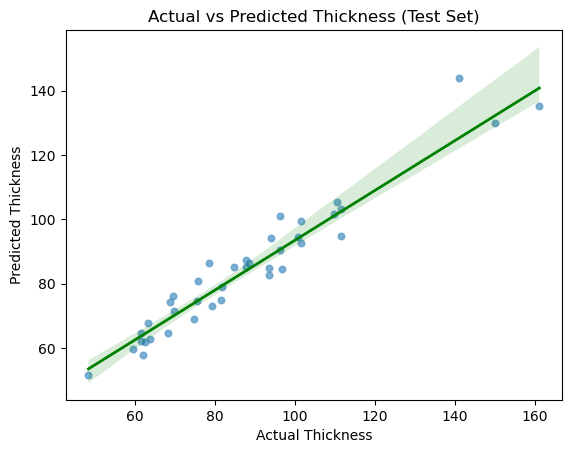

In [44]:
best_model, y_pred, test_pred = SP8.summarize(metric='RMSE')

Best Model: MLPRegressor
Best hyperparams: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Best performance: R2       0.951537
RMSE     5.400063
MSE     29.160680
MAE      4.520326
MAPE     5.326819
Name: MLPRegressor, dtype: float64


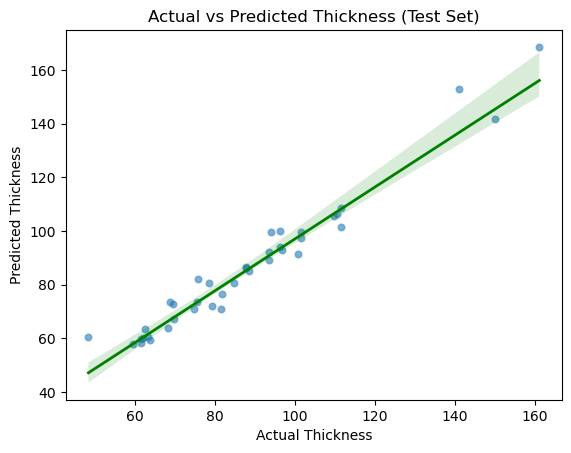

Best Model: KNeighborsRegressor
Best hyperparams: OrderedDict([('algorithm', 'auto'), ('n_neighbors', 2), ('weights', 'distance')])
Best performance: R2       0.960720
RMSE     4.861630
MSE     23.635442
MAE      3.681286
MAPE     4.021058
Name: KNeighborsRegressor, dtype: float64


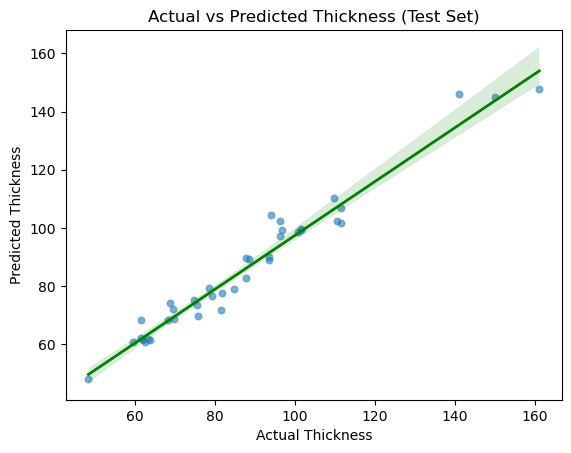

Best Model: MLPRegressor
Best hyperparams: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': [50, 50], 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
Best performance: R2       0.885560
RMSE     8.298187
MSE     68.859903
MAE      6.684045
MAPE     7.994024
Name: MLPRegressor, dtype: float64


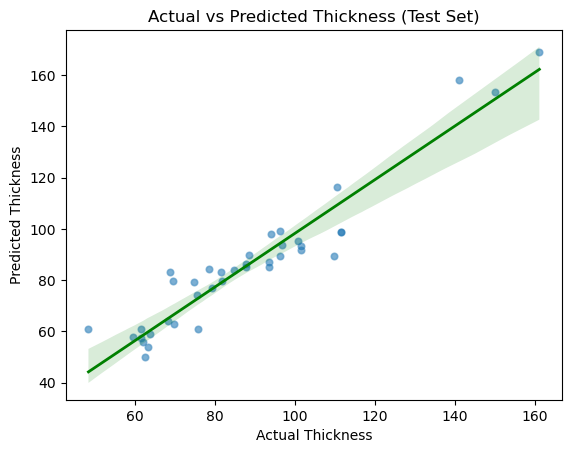

Best Model: MLPRegressor
Best hyperparams: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': [100, 100], 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Best performance: R2       0.876368
RMSE     8.625016
MSE     74.390896
MAE      5.781207
MAPE     6.872073
Name: MLPRegressor, dtype: float64


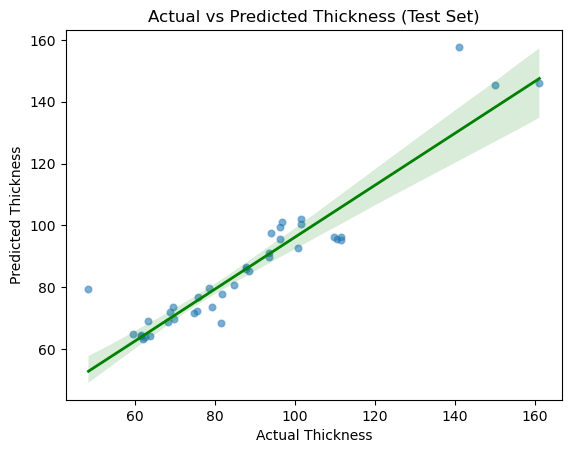

Best Model: AdaBoostRegressor
Best hyperparams: OrderedDict([('learning_rate', 0.001), ('n_estimators', 50)])
Best performance: R2       0.928710
RMSE     6.549519
MSE     42.896203
MAE      5.184347
MAPE     5.812152
Name: AdaBoostRegressor, dtype: float64


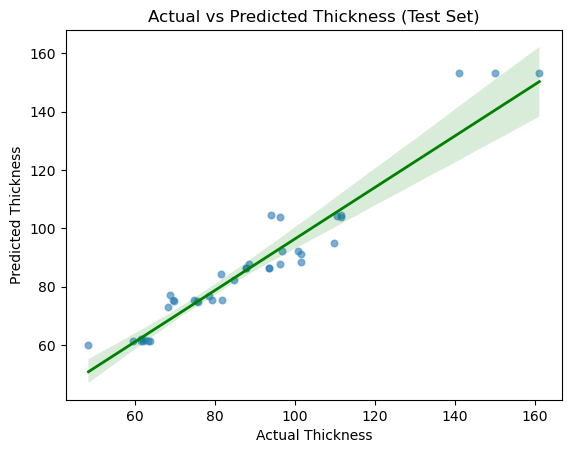

Best Model: CatBoostRegressor
Best hyperparams: OrderedDict([('depth', 5), ('iterations', 500), ('learning_rate', 0.18194044989243544)])
Best performance: R2        0.733922
RMSE     12.653158
MSE     160.102399
MAE       8.046214
MAPE      8.328537
Name: CatBoostRegressor, dtype: float64


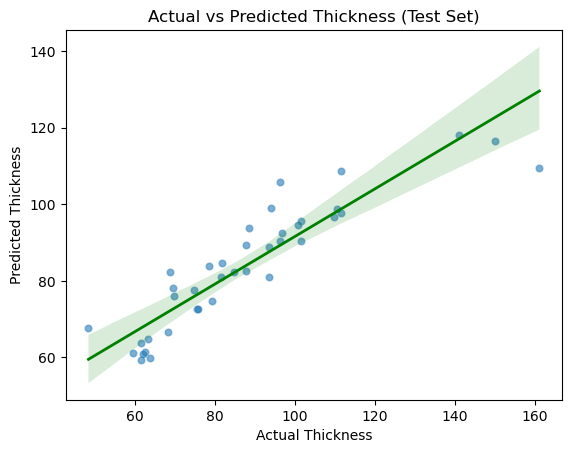

Best Model: AdaBoostRegressor
Best hyperparams: OrderedDict([('learning_rate', 0.7599224189072973), ('n_estimators', 500)])
Best performance: R2       0.938203
RMSE     6.097865
MSE     37.183959
MAE      4.849356
MAPE     5.446930
Name: AdaBoostRegressor, dtype: float64


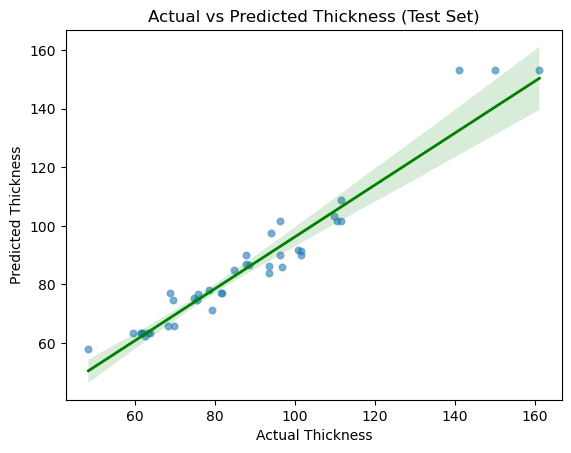

Best Model: CatBoostRegressor
Best hyperparams: OrderedDict([('depth', 3), ('iterations', 500), ('learning_rate', 0.14830358662649198)])
Best performance: R2       0.897251
RMSE     7.862908
MSE     61.825317
MAE      5.706998
MAPE     6.011383
Name: CatBoostRegressor, dtype: float64


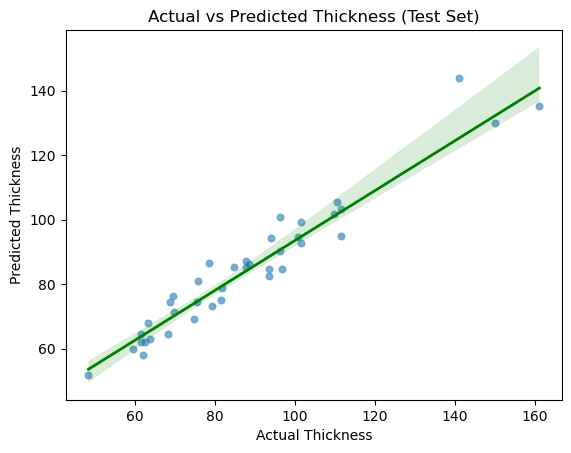

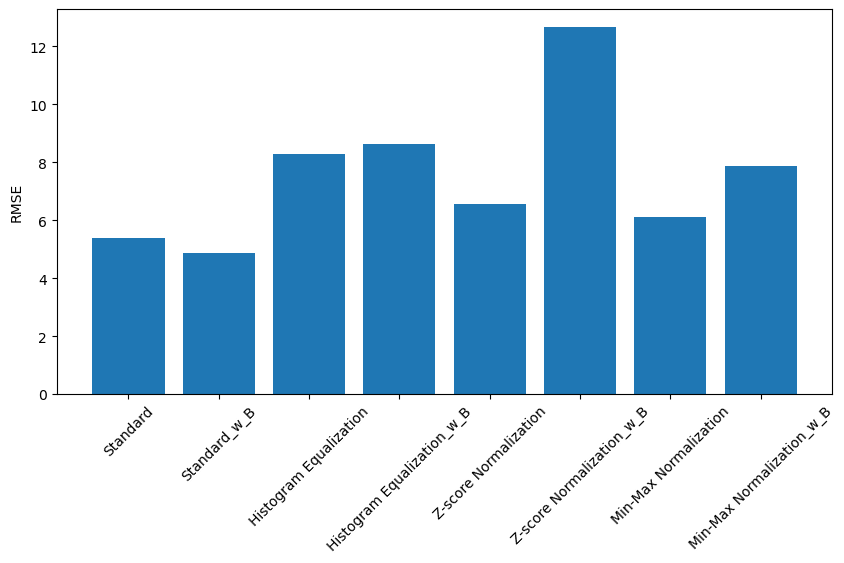

,Methods,RMSE
1,Standard_w_B,4.861630
0,Standard,5.400063
6,Min-Max Normalization,6.097865
4,Z-score Normalization,6.549519
7,Min-Max Normalization_w_B,7.862908
2,Histogram Equalization,8.298187
3,Histogram Equalization_w_B,8.625016
5,Z-score Normalization_w_B,12.653158


In [45]:
sp1_best_model, sp1_y_pred, sp1_test_pred = SP1.summarize(metric='RMSE')
sp2_best_model, sp2_y_pred, sp2_test_pred = SP2.summarize(metric='RMSE')
sp3_best_model, sp3_y_pred, sp3_test_pred = SP3.summarize(metric='RMSE')
sp4_best_model, sp4_y_pred, sp4_test_pred = SP4.summarize(metric='RMSE')
sp5_best_model, sp5_y_pred, sp5_test_pred = SP5.summarize(metric='RMSE')
sp6_best_model, sp6_y_pred, sp6_test_pred = SP6.summarize(metric='RMSE')
sp7_best_model, sp7_y_pred, sp7_test_pred = SP7.summarize(metric='RMSE')
sp8_best_model, sp8_y_pred, sp8_test_pred = SP8.summarize(metric='RMSE')

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Compare All Methods

methods = ['Standard','Standard_w_B',
           'Histogram Equalization','Histogram Equalization_w_B',
           'Z-score Normalization','Z-score Normalization_w_B',
           'Min-Max Normalization','Min-Max Normalization_w_B']

y_preds = [sp1_y_pred, sp2_y_pred, sp3_y_pred, sp4_y_pred, sp5_y_pred, sp6_y_pred, sp7_y_pred, sp8_y_pred]

#calculate RMSE
y_test = SP1.y_test

rmse = []
for y_pred in y_preds:
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
#plot
plt.figure(figsize=(10,5))
plt.bar(methods, rmse)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.show()

# Dataframe
RMSE_comparing = pd.DataFrame({'Methods':methods, 'RMSE':rmse})
display(RMSE_comparing.sort_values(by='RMSE'))